In [21]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import nltk

In [12]:
df = pd.read_csv("ClassicsKenyans.tsv", sep='\t')
df.head(10)

,Artist,Lyrics
0,E-sir feat Nameless,"Intro Tumekuja, kuparty, Dj hebu weka tracky T..."
1,gigidi majimaji,Chorus Who can bwogo me Who can bwogo me Wh...
2,E-sir,Jasho yatiririka Moyo wapiga Kila mtu Anawika ...
3,Mr. Googz Githurai,Intro (Lenny) when we… should we say… lemme se...
4,Kleptomaniaxx,Verse 1 (Nakiri aka Nyashinski) ka ningekuwa m...
5,E-sir,[Intro: E-Sir] Ogopa Police Station presents I...


In [16]:
popular = df['Artist'].value_counts()

In [14]:
popular

E-sir                  2
Mr. Googz Githurai     1
Kleptomaniaxx          1
gigidi majimaji        1
E-sir feat Nameless    1
Name: Artist, dtype: int64

In [17]:
top_artists = df['Artist']
top_artists

0    E-sir feat Nameless
1        gigidi majimaji
2                  E-sir
3     Mr. Googz Githurai
4          Kleptomaniaxx
5                  E-sir
Name: Artist, dtype: object

In [18]:
len(top_artists)

6

In [19]:
artists_lowercase = []
for x in top_artists:
    artists_lowercase.append(x.lower())
    pass
artists_lowercase       

['e-sir feat nameless',
 'gigidi majimaji',
 'e-sir',
 'mr. googz githurai',
 'kleptomaniaxx',
 'e-sir']

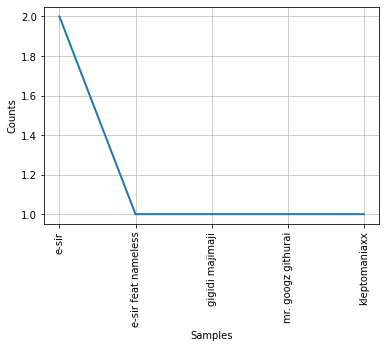

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [25]:
frewqDist = nltk.FreqDist(artists_lowercase)
frewqDist.plot()

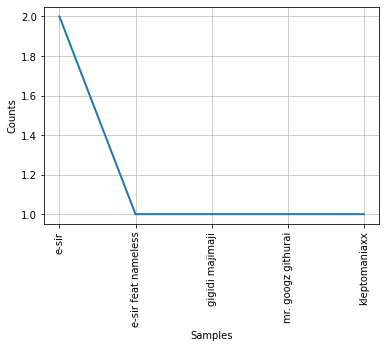

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [23]:
frewqDist.plot()

In [24]:
artist_ = []
for x in artists_lowercase:
    artist = []
    for y in word_tokenize(x):
        artist.append(y)
        pass
    artist_.append(artist)
    pass
artist_        

[['e-sir', 'feat', 'nameless'],
 ['gigidi', 'majimaji'],
 ['e-sir'],
 ['mr.', 'googz', 'githurai'],
 ['kleptomaniaxx'],
 ['e-sir']]

In [27]:
artistss_ = []
for x in artist_:
    for y in x:
        artistss_.append(y)
        pass
    pass
artistss_

['e-sir',
 'feat',
 'nameless',
 'gigidi',
 'majimaji',
 'e-sir',
 'mr.',
 'googz',
 'githurai',
 'kleptomaniaxx',
 'e-sir']

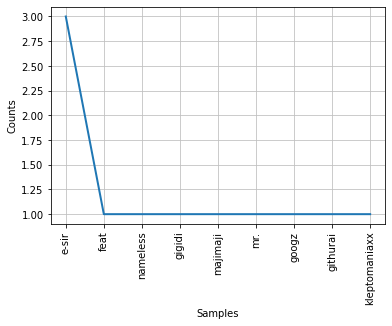

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [28]:
frewqDist = nltk.FreqDist(artistss_)
frewqDist.plot()

In [29]:
''' Remove unnecessary words such as feat and mr'''
no_fills = []
fillers = ['feat', 'mr.']
for x in artistss_:
    if x not in fillers:
        no_fills.append(x)
        pass
    pass
no_fills      

['e-sir',
 'nameless',
 'gigidi',
 'majimaji',
 'e-sir',
 'googz',
 'githurai',
 'kleptomaniaxx',
 'e-sir']

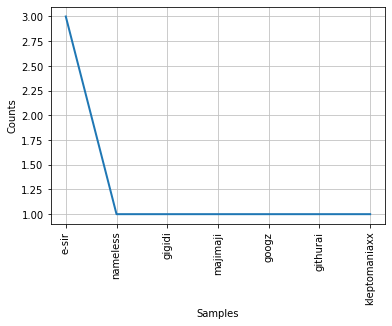

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [31]:
frewqDist = nltk.FreqDist(no_fills)
frewqDist.plot()

In [47]:
'''Determine an artist\'s key index on the song by calculating the number of times their names occur
divided by the total number of artists multiply the result by 100%'''
sample = ['e-sir feat nameless', 'mr. Googz', 'Nameless']
def topArtists(token):
    tokenized = []
    for x in token:
        for y in (nltk.word_tokenize(x)):
            tokenized.append(y)
            pass
        pass
    return tokenized

In [53]:
top_artists = topArtists(df.Artist)
top_artists
# hitRatioBasedOnArtist

['E-sir',
 'feat',
 'Nameless',
 'gigidi',
 'majimaji',
 'E-sir',
 'Mr.',
 'Googz',
 'Githurai',
 'Kleptomaniaxx',
 'E-sir']

In [64]:
def hitRatioBasedOnArtist(artists):
    lower_cased = []
    for x in artists:
        lower_cased.append(x.lower())
        pass
    return nltk.FreqDist(lower_cased)    

In [66]:
hits_index_map = hitRatioBasedOnArtist(top_artists)
hits_index_map

FreqDist({'e-sir': 3, 'feat': 1, 'nameless': 1, 'gigidi': 1, 'majimaji': 1, 'mr.': 1, 'googz': 1, 'githurai': 1, 'kleptomaniaxx': 1})

In [80]:
def asignWeight(artists):
    tokenized = nltk.word_tokenize(artists.lower())
    totalweights = 0
    song_weight = 0
    for x in hits_index_map.values():
        totalweights += x
        pass
    for y in tokenized:
        song_weight += hits_index_map[y]
        pass
    return (song_weight / totalweights) * 100

In [81]:
asignWeight('e-sir feat nameless')

45.45454545454545

In [82]:
'''apply weights based on the presence of an artist in the song'''

df['weight_on_artist'] = df['Artist'].apply(lambda c: asignWeight(c))
df.head()

,Artist,Lyrics,weight_on_artist
0,E-sir feat Nameless,"Intro Tumekuja, kuparty, Dj hebu weka tracky T...",45.454545
1,gigidi majimaji,Chorus Who can bwogo me Who can bwogo me Wh...,18.181818
2,E-sir,Jasho yatiririka Moyo wapiga Kila mtu Anawika ...,27.272727
3,Mr. Googz Githurai,Intro (Lenny) when we… should we say… lemme se...,27.272727
4,Kleptomaniaxx,Verse 1 (Nakiri aka Nyashinski) ka ningekuwa m...,9.090909


In [33]:
'''process lyrics'''
lyrics = df['Lyrics']
lyrics

0    Intro Tumekuja, kuparty, Dj hebu weka tracky T...
1    Chorus  Who can bwogo me  Who can bwogo me  Wh...
2    Jasho yatiririka Moyo wapiga Kila mtu Anawika ...
3    Intro (Lenny) when we… should we say… lemme se...
4    Verse 1 (Nakiri aka Nyashinski) ka ningekuwa m...
5    [Intro: E-Sir] Ogopa Police Station presents I...
Name: Lyrics, dtype: object

In [34]:
df.head()

,Artist,Lyrics
0,E-sir feat Nameless,"Intro Tumekuja, kuparty, Dj hebu weka tracky T..."
1,gigidi majimaji,Chorus Who can bwogo me Who can bwogo me Wh...
2,E-sir,Jasho yatiririka Moyo wapiga Kila mtu Anawika ...
3,Mr. Googz Githurai,Intro (Lenny) when we… should we say… lemme se...
4,Kleptomaniaxx,Verse 1 (Nakiri aka Nyashinski) ka ningekuwa m...
